In [1]:
#Load necessary libraries
import pylab
%pylab inline
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


Populating the interactive namespace from numpy and matplotlib


C:\Users\Umar Ibn Ali\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#load dataset in pandas
df= pd.read_csv("/Users/Umar Ibn Ali/Desktop/FYP/Model/Japan_dataset.csv")

In [3]:
#check dataset
df.head()

,Year,GPI,GDP,No of country,Density,Population
0,1991,NaN,28718,1,339.9,6398
1,1992,NaN,31194,1,340.7,6669
2,1993,NaN,35657,1,341.6,6495
3,1994,NaN,39224,1,342.7,5942
4,1995,NaN,43455,4,344.0,5435


In [4]:
df.describe()

,Year,GPI,GDP,No of country,Density,Population
count,26.000000,9.000000,26.000000,26.000000,26.000000,26.000000
mean,2003.500000,1.295556,37646.730769,12.615385,347.703846,3519.846154
std,7.648529,0.051822,4822.744485,6.603496,3.538303,1626.611981
min,1991.000000,1.230000,28718.000000,1.000000,339.900000,1794.000000
25%,1997.250000,1.247000,34894.250000,6.500000,345.275000,2367.500000
50%,2003.500000,1.293000,37464.500000,15.000000,348.800000,2617.500000
75%,2009.750000,1.323000,39396.500000,18.000000,350.500000,4761.250000
max,2016.000000,1.395000,48633.000000,19.000000,351.300000,6669.000000


In [5]:
#fill column with missing values
df['GPI'].fillna(mean(df.GPI),inplace=True)

In [6]:
#check the columns with missing values
df.apply(lambda x: sum(x.isnull()),axis=0)

Year             0
GPI              0
GDP              0
No of country    0
Density          0
Population       0
dtype: int64

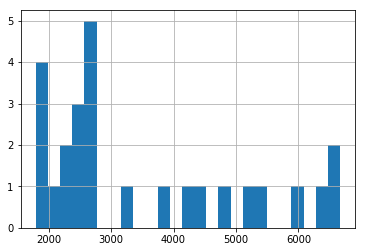

In [7]:
#check population histogram
df['Population'].hist(bins=25)

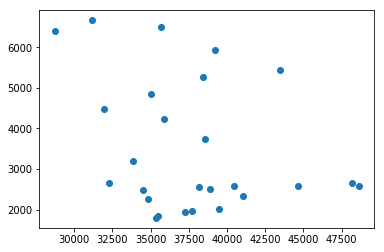

In [8]:
#check relationship between GDP and Population
import matplotlib.pyplot as plt
plt.scatter(df['GDP'], df['Population'])
plt.show() 

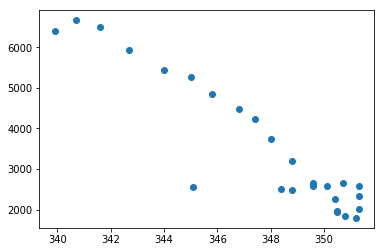

In [9]:
#check relationship between Density and Population
plt.scatter(df['Density'], df['Population'])
plt.show() 

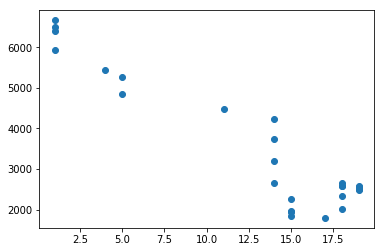

In [10]:
#check relationship between No of country and Population
plt.scatter(df['No of country'], df['Population'])
plt.show() 

In [11]:
#check GDP and Population linear relationship
feature_cols = ['GDP']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  7529.33445071
Coefficient:  [-0.10650296]
R squared value:  0.0997111985625


In [12]:
#check Density and Population linear relationship
feature_cols = ['Density']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  153003.227475
Coefficient:  [-429.9158119]
R squared value:  0.874558415239


In [13]:
#check No of Country and Population linear relationship
feature_cols = ['No of country']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  6425.5060683
Coefficient:  [-230.32670054]
R squared value:  0.874315991574


In [14]:
# include all variables to build a model
X = df[['GDP', 'Density', 'No of country','GPI']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  838.242664039
MAE Score:  553.924888139
MSE Score:  702650.763815
R squared value:  0.88948632206


In [15]:
# include all variables to build a model
X = df[['Density', 'No of country']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  362.845976047
MAE Score:  306.578512234
MSE Score:  131657.202333
R squared value:  0.933012232258


In [16]:
# include all variables to build a model
X = df[['GDP', 'Density', 'No of country']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  298.977097944
MAE Score:  236.875748047
MSE Score:  89387.3050948
R squared value:  0.939856734728


In [17]:
#predict the GDP for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['GDP']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted GDP for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.148164123407
Predicted GDP for year:  2017 [[ 43340.75480769]]
Predicted GDP for year:  2018 [[ 43657.49278846]]
Predicted GDP for year:  2019 [[ 43974.23076923]]
Predicted GDP for year:  2020 [[ 44290.96875]]
Predicted GDP for year:  2021 [[ 44607.70673077]]
Predicted GDP for year:  2022 [[ 44924.44471154]]


array([[ 43024.01682692]])

In [18]:
#predict the Density for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['Density']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted Density for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.518276420622
Predicted Density for year:  2017 [[ 352.83525641]]
Predicted Density for year:  2018 [[ 353.19155983]]
Predicted Density for year:  2019 [[ 353.54786325]]
Predicted Density for year:  2020 [[ 353.90416667]]
Predicted Density for year:  2021 [[ 354.26047009]]
Predicted Density for year:  2022 [[ 354.6167735]]


array([[ 352.47895299]])

In [19]:
#predict the GDP for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['No of country']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted No of country for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.84830747157
Predicted No of country for year:  2017 [[ 22.96919187]]
Predicted No of country for year:  2018 [[ 23.73232512]]
Predicted No of country for year:  2019 [[ 24.49545838]]
Predicted No of country for year:  2020 [[ 25.25859163]]
Predicted No of country for year:  2021 [[ 26.02172488]]
Predicted No of country for year:  2022 [[ 26.78485813]]


array([[ 22.20605862]])

In [20]:
# Forecasted Population of Indonesia
X = df[['GDP','Density','No of country']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)


    
var_2017 = [[43340.75480769,352.83525641,23.58133013]]
var_2018 = [[43657.49278846,353.19155983,24.4231437]]
var_2019 = [[43974.23076923,353.54786325,25.26495726]]                               
var_2020 = [[44290.96875,353.90416667,26.10677083]]
var_2021 = [[44607.70673077,354.26047009,26.9485844]]
var_2022 = [[44924.44471154,354.6167735,27.79039797]]

print("Predicted Population for year 2017: ",lm2.predict(var_2017))
print("Predicted Population for year 2018: ",lm2.predict(var_2018))
print("Predicted Population for year 2019: ",lm2.predict(var_2019))
print("Predicted Population for year 2020: ",lm2.predict(var_2020))
print("Predicted Population for year 2021: ",lm2.predict(var_2021))
print("Predicted Population for year 2022: ",lm2.predict(var_2022))



Predicted Population for year 2017:  [ 1199.1891979]
Predicted Population for year 2018:  [ 1025.20819001]
Predicted Population for year 2019:  [ 851.22718282]
Predicted Population for year 2020:  [ 677.24617492]
Predicted Population for year 2021:  [ 503.26516703]
Predicted Population for year 2022:  [ 329.2841626]


In [21]:
var_2016=[[43024.01682692,352.47895299,22.73951656]]
lm2.predict(var_2016)

array([ 1373.17020579])